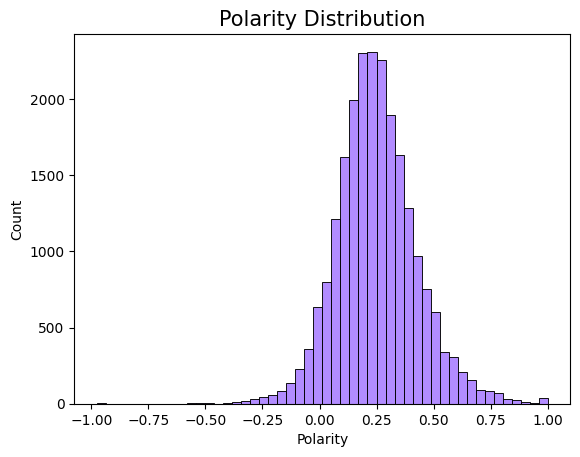

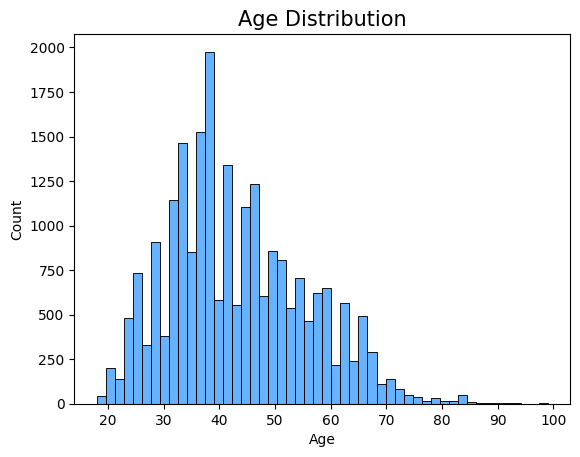

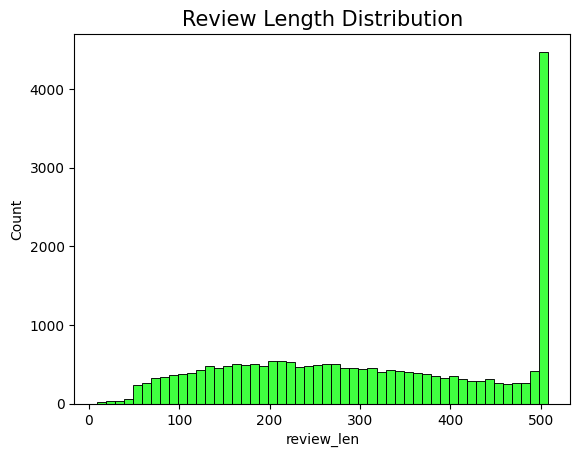

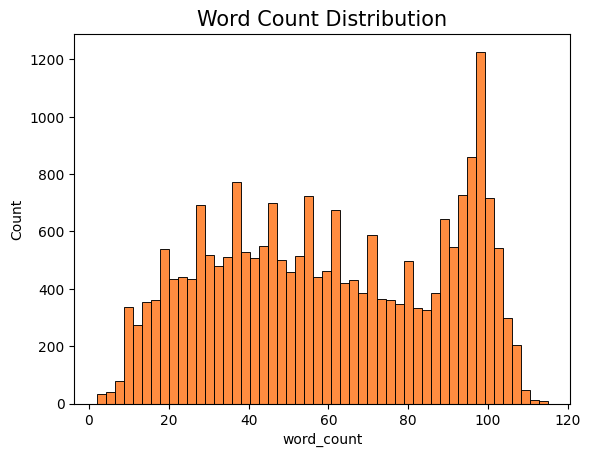

C:\Users\bharg\AppData\Local\Temp\ipykernel_34916\2590972442.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', palette='viridis', data=df)


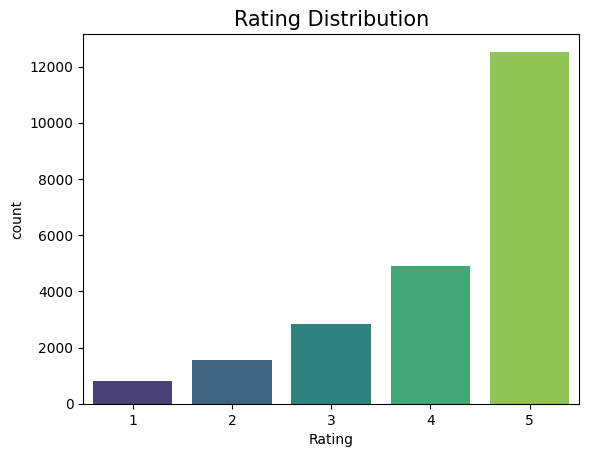

C:\Users\bharg\AppData\Local\Temp\ipykernel_34916\2590972442.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Division Name', palette='viridis', data=df)


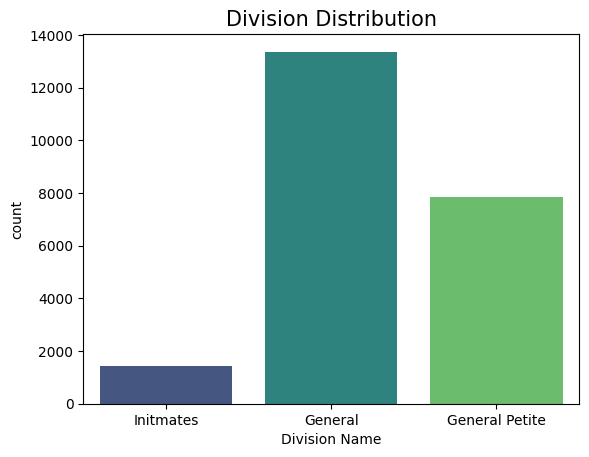

C:\Users\bharg\AppData\Local\Temp\ipykernel_34916\2590972442.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department Name', palette='viridis', data=df)


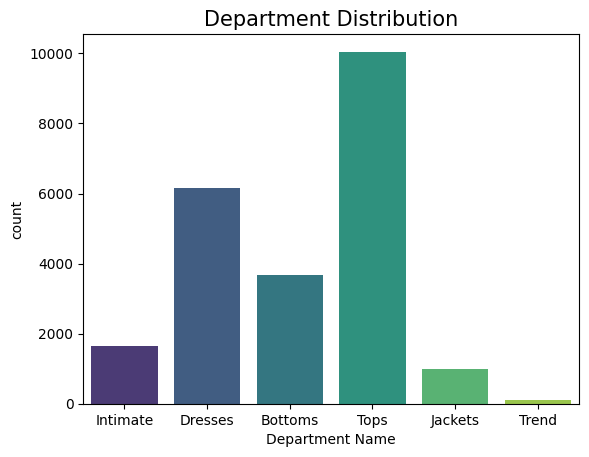

C:\Users\bharg\AppData\Local\Temp\ipykernel_34916\2590972442.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Class Name', palette='viridis', data=df)


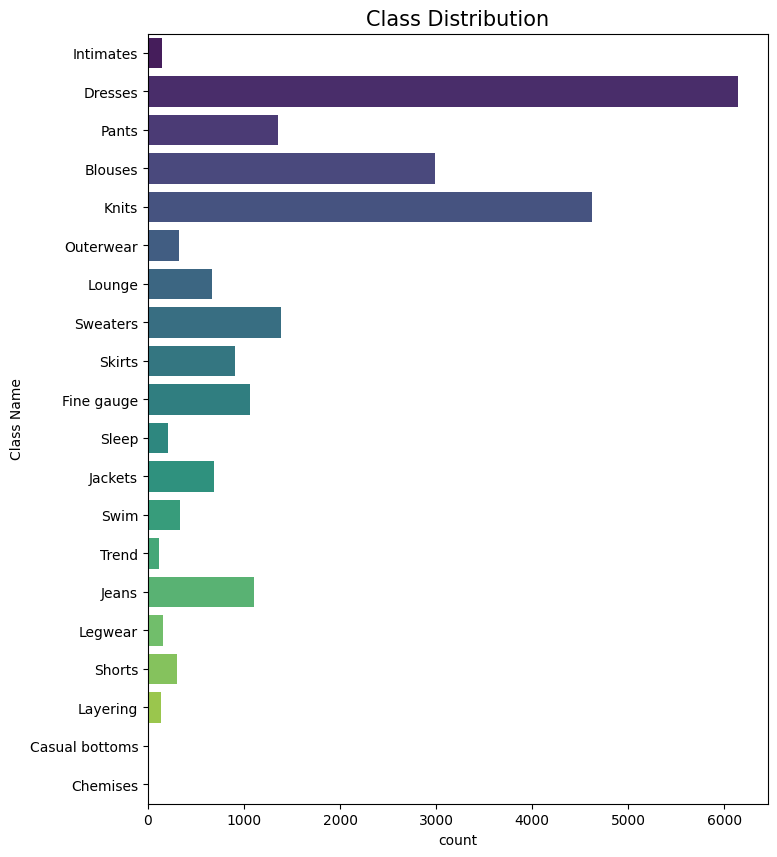

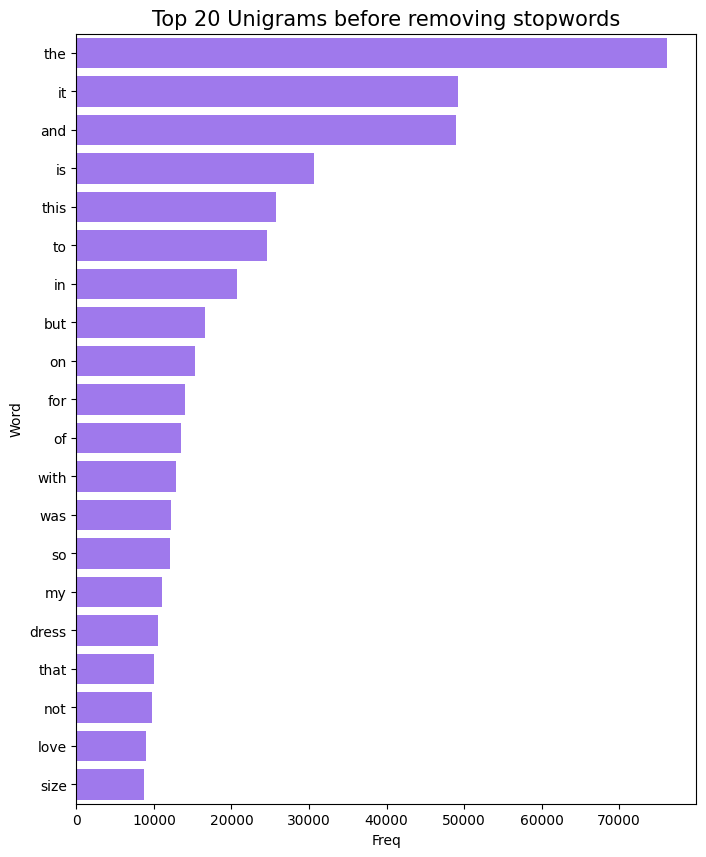

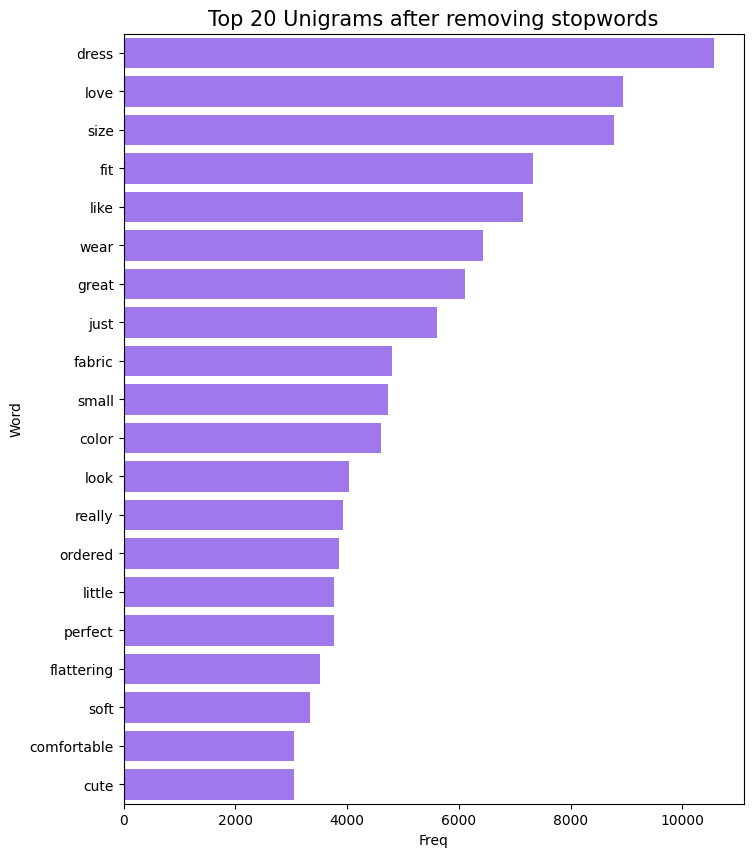

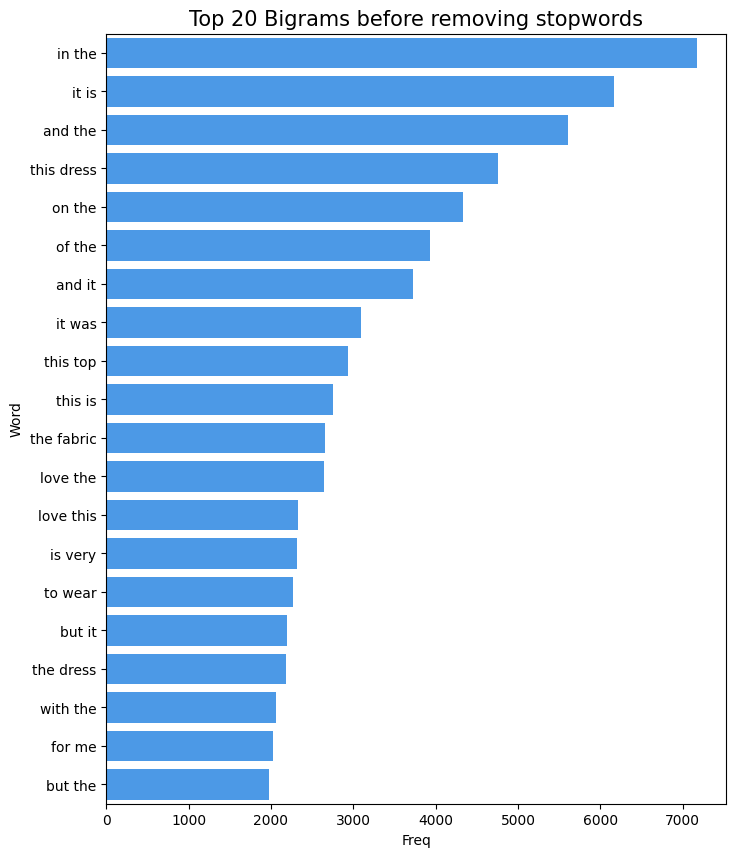

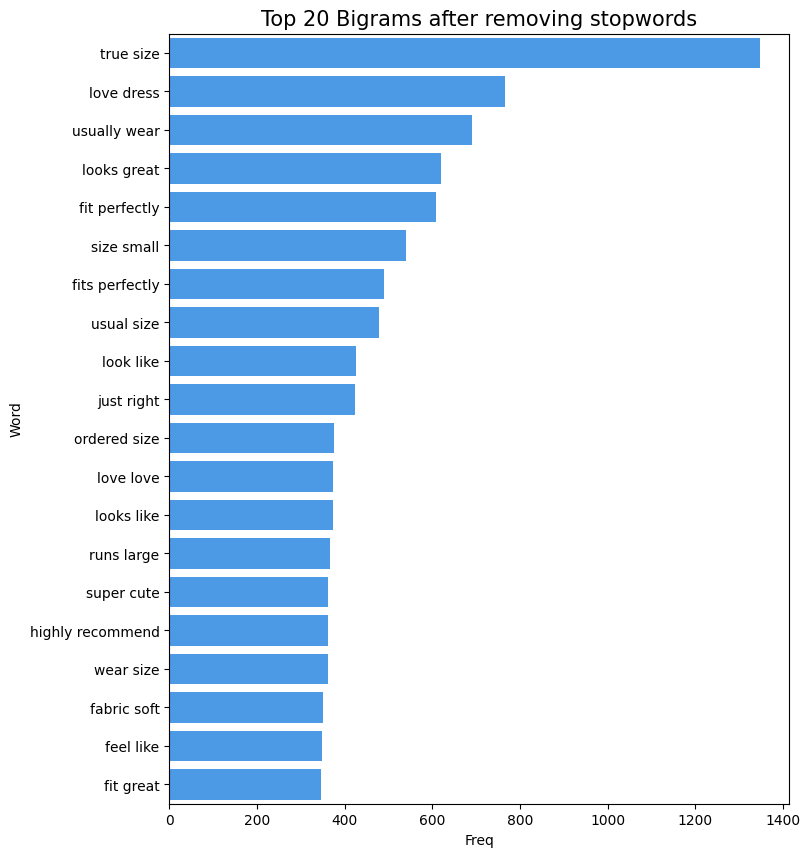

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
df = pd.read_csv('text data.csv')

# Drop unnecessary columns and rows with null values
df.drop(['Unnamed: 0', 'Title'], axis=1, inplace=True)
df.dropna(inplace=True)

# Preprocess the review text
df['Review Text'] = df['Review Text'].str.replace("(<br/>)|(<a).(>).(</a>)|(&amp)|(&gt)|(&lt)|(\xa0)", "", regex=True)

# Calculate sentiment polarity, word count, and review length
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))
df['review_len'] = df['Review Text'].apply(len)

# Visualize distributions
features = ['Polarity', 'Age', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review Length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors):
    sns.histplot(df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

# Distribution of review ratings, division, department, and class names
sns.countplot(x='Rating', palette='viridis', data=df)
plt.title('Rating Distribution', size=15)
plt.show()

sns.countplot(x='Division Name', palette='viridis', data=df)
plt.title('Division Distribution', size=15)
plt.show()

sns.countplot(x='Department Name', palette='viridis', data=df)
plt.title('Department Distribution', size=15)
plt.show()

plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=df)
plt.title('Class Distribution', size=15)
plt.show()

# Function to get top N-grams
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=20):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['Word', 'Freq'])

# Top N-grams before and after removing stop words
unigrams = get_top_ngrams(df['Review Text'], (1, 1))
bigrams = get_top_ngrams(df['Review Text'], (2, 2))
trigrams = get_top_ngrams(df['Review Text'], (3, 3))

unigrams_st = get_top_ngrams(df['Review Text'], (1, 1), 'english')
bigrams_st = get_top_ngrams(df['Review Text'], (2, 2), 'english')
trigrams_st = get_top_ngrams(df['Review Text'], (3, 3), 'english')

# Visualize top N-grams
def plot_ngrams(df, title, color):
    plt.figure(figsize=(8, 10))
    sns.barplot(x='Freq', y='Word', color=color, data=df)
    plt.title(title, size=15)
    plt.show()

plot_ngrams(unigrams, 'Top 20 Unigrams before removing stopwords', '#9966ff')
plot_ngrams(unigrams_st, 'Top 20 Unigrams after removing stopwords', '#9966ff')
plot_ngrams(bigrams, 'Top 20 Bigrams before removing stopwords', '#3399ff')
plot_ngrams(bigrams_st, 'Top 20 Bigrams after removing stopwords', '#3399ff')
